# Task 1

1. Load the dataset into a dataframe that can be used for predicting  traffic_volume a day in advance.

In [1]:
import pandas as pd
df = pd.read_csv("metro_traffic_15_19.csv")
df['date_time'] = pd.to_datetime(df['date_time'])
df.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936


2. Produce some plots at different time-scales to see if there is periodicity in the traffic volume. 

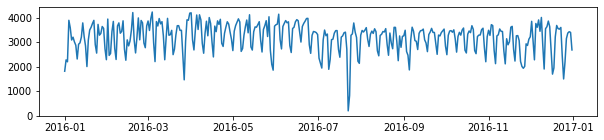

In [2]:
from matplotlib import pyplot as plt
#plot mean traffic volume every day in 2016
daily_resample = df.resample("D", on="date_time").mean()
days_2016 = daily_resample.loc[(daily_resample.index >= '2016-01-01') & (daily_resample.index <= '2016-12-31')]
plt.figure(figsize=(10,2))
plt.plot(days_2016.index, days_2016["traffic_volume"])

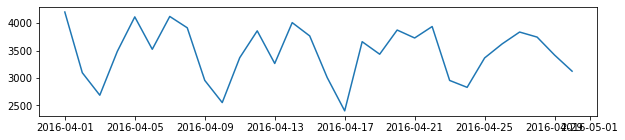

In [4]:
#plot mean traffic volume every day in april 2016
days_april_2016 = daily_resample.loc[(daily_resample.index >= '2016-04-01') & (daily_resample.index <= '2016-04-30')]
plt.figure(figsize=(10,2))
plt.plot(days_april_2016.index, days_april_2016["traffic_volume"])

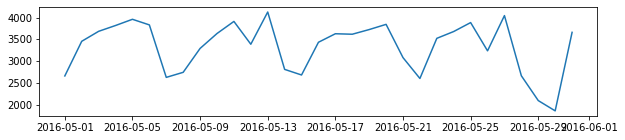

In [5]:
#plot mean traffic volume every day in may 2016
days_may_2016 = daily_resample.loc[(daily_resample.index >= '2016-05-01') & (daily_resample.index <= '2016-05-31')]
plt.figure(figsize=(10,2))
plt.plot(days_may_2016.index, days_may_2016["traffic_volume"])

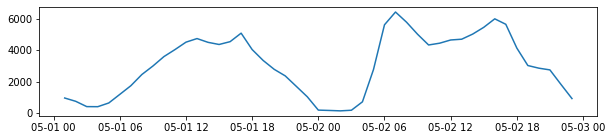

In [6]:
#plot mean traffic volume every day hour on may 2, 2016
hourly_resample = df.resample("H", on="date_time").mean()
hourly_may_2 = hourly_resample.loc[(hourly_resample.index > '2016-05-01') & (hourly_resample.index < '2016-05-03')]
plt.figure(figsize=(10,2))
plt.plot(hourly_may_2.index, hourly_may_2["traffic_volume"])

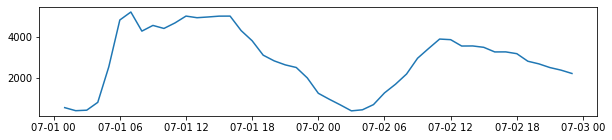

In [7]:
#plot mean traffic volume every day hour on july 2, 2016
hourly_resample = df.resample("H", on="date_time").mean()
hourly_july_2 = hourly_resample.loc[(hourly_resample.index > '2016-07-01') & (hourly_resample.index < '2016-07-03')]
plt.figure(figsize=(10,2))
plt.plot(hourly_july_2.index, hourly_july_2["traffic_volume"])

Based on the plots above, it seems like traffic volume's most meaningful periodicity is within a 24-hour cycle. 

# Task 2

1. Extract hour, day and month features from the time-stamps. 

In [8]:
df['hour'] = df['date_time'].apply(lambda x:x.hour)
df['day'] = df['date_time'].apply(lambda x:x.day)
df['month'] = df['date_time'].apply(lambda x:x.month)
df.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,hour,day,month
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,0,1,7
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,1,1,7
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,2,1,7
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356,3,1,7
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936,4,1,7


2. Divide the data into train and test sets keeping one third of the data for testing. 

In [9]:
#split test and train data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

y = df["traffic_volume"]
X = df.drop(["date_time", "traffic_volume"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

3. Build two different regression models and test the accuracy. Try Linear Regression and one other regression model from scikit learn. 


#### Linear regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

LR = LinearRegression()
LR.fit(X_train, y_train)

print('R squared statistic: {}'.format(LR.score(X_train, y_train)))

R squared statistic: 0.13476365500273846


In [11]:
#test
y_pred_LR = LR.predict(X_test)

# predicting the accuracy score
print("R squared statistic:", r2_score(y_test,y_pred_LR))

R squared statistic: 0.14625556832675224


These are concerningly low R-squared statistics.

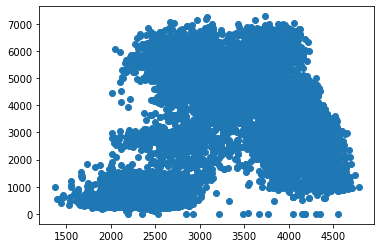

In [12]:
import matplotlib.pyplot as plt
plt.scatter(y_pred_LR, y_test)

This regressor is terrible and highly inaccurrate. There seems to be almost no relationship between what this regressor predicts and the observed traffic volume.

#### Decision tree regression

In [13]:
from sklearn.tree import DecisionTreeRegressor 

DR = DecisionTreeRegressor(max_depth=5)
DR.fit(X_train, y_train)

#test
print("R squared statistic:", DR.score(X_train,y_train))

R squared statistic: 0.7743574916130415


In [14]:
y_pred_DR = DR.predict(X_test)
print("R squared statistic:", r2_score(y_test,y_pred_DR))

R squared statistic: 0.7794332798802366


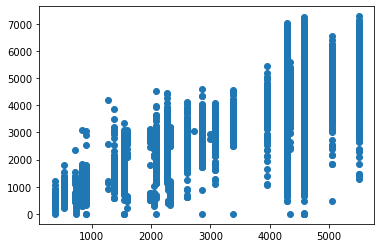

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_DR, y_test)

This regressor performs much better. 

# Task 3

1. Given that the linear numeric encoding of the hour, day and month features may miss cyclical signals, investigate and test a cyclical strategy for encoding these features. Does this strategy improve accuracy for the models tested in Task 2?


In [16]:
#encode hours cyclically
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24.0)

#encode days cyclically
df['day_sin'] = np.sin(2 * np.pi * df['day']/24.0)
df['day_cos'] = np.cos(2 * np.pi * df['day']/24.0)

#encode months cyclically
df['month_sin'] = np.sin(2 * np.pi * df['month']/24.0)
df['month_cos'] = np.cos(2 * np.pi * df['month']/24.0)

df.head()

,date_time,rain_1h,snow_1h,temp,clouds_all,traffic_volume,hour,day,month,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,2015-07-01 00:00:00,0.0,0.0,289.20,1,737,0,1,7,0.000000,1.000000,0.258819,0.965926,0.965926,-0.258819
1,2015-07-01 01:00:00,0.0,0.0,289.40,1,444,1,1,7,0.258819,0.965926,0.258819,0.965926,0.965926,-0.258819
2,2015-07-01 02:00:00,0.0,0.0,289.19,1,347,2,1,7,0.500000,0.866025,0.258819,0.965926,0.965926,-0.258819
3,2015-07-01 03:00:00,0.3,0.0,288.74,1,356,3,1,7,0.707107,0.707107,0.258819,0.965926,0.965926,-0.258819
4,2015-07-01 04:00:00,0.0,0.0,288.07,1,936,4,1,7,0.866025,0.500000,0.258819,0.965926,0.965926,-0.258819


#### Linear Regressor

In [17]:
#fit new regressor with these new columns
cyclical_df = df.drop(["date_time", "hour", "day", "month"], axis=1)

y = cyclical_df["traffic_volume"]
X = cyclical_df.drop(["traffic_volume"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

LR = LinearRegression()
LR.fit(X_train, y_train)

print('R squared statistic: {}'.format(LR.score(X_train, y_train)))

R squared statistic: 0.6471086257270223


This is a considerable improvement for the linear regressor's performance.

In [18]:
#test
y_prediction = LR.predict(X_test)
y_prediction

# predicting the accuracy score
print("R2 score is", r2_score(y_test, y_prediction))

R2 score is 0.63967507007447


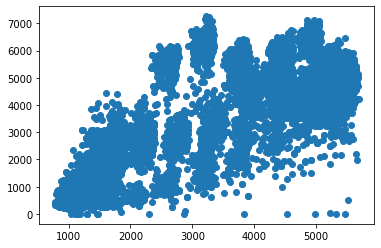

In [19]:
plt.scatter(y_prediction, y_test)

This linear regressor has much more predictive power.

#### Decision Tree Regressor

In [20]:
#fit decision tree regressor with these new columns
DR = DecisionTreeRegressor(max_depth=5)
DR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [21]:
#test
y_pred = DR.predict(X_test)
r2_score(y_test,y_pred)

0.7701964817626905

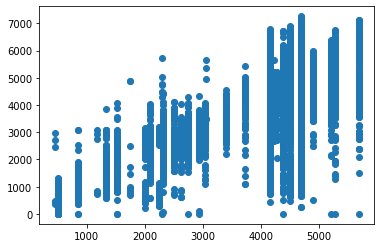

In [22]:
plt.scatter(y_pred, y_test)

This has not affected the Decision Tree Regressor's performance very much.

# Task 4

1. Identify subsets of the features for this prediction task. These can be the same subset for all models or model-specific subsets.

In [23]:
#get set of all possible subsets
from itertools import chain, combinations

def powerset(iterable): 
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

powerset_cols = powerset(X.columns) #excludes traffic_volume

psc=list(powerset_cols)[1:]
psc_list = [list(item) for item in psc]

In [24]:
#eliminate subsets that only have 1/2 of a time unit's cyclical encoding

trouble_subsets = []
for subset in psc_list:
    for time in ["hour", "day", "month"]:
        if (int(time+"_sin" in subset) + int(time+"_cos" in subset) == 1):
            trouble_subsets.append(subset)

valid_subsets = [subset for subset in psc_list if (subset not in trouble_subsets)]

In [25]:
#find best subset for LR
subset_scores = {}

#train and test LR with all subsets
for subset in valid_subsets:
    #create df with that subset of columns
    subset_df = cyclical_df.filter(items=list(subset))
    
    #train model
    y = cyclical_df["traffic_volume"]
    X = subset_df

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    
    #test accurracy
    y_prediction = LR.predict(X_test)

    score= r2_score(y_test,y_prediction)
    
    #add entry to dictionary
    subset_scores[score]=subset
    
#get subset of model with highest acurracy
best=max(subset_scores.keys())
print("The best subset was", subset_scores[best], "with a score of", best)

The best subset was ['snow_1h', 'temp', 'clouds_all', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos'] with a score of 0.6545536897420914


In [27]:
cyclical_df.columns

Index(['rain_1h', 'snow_1h', 'temp', 'clouds_all', 'traffic_volume',
       'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos'],
      dtype='object')

The best feature subset for the linear regressor includes all features except rain_1h, and is not signifanctly better than the one that includes all features. 

In [28]:
#find best subset for DR
subset_scores = {}

#train and test DR with all subsets
for subset in valid_subsets:
    #create df with that subset of columns
    subset_df = cyclical_df.filter(items=list(subset))
    
    #train model
    y = cyclical_df["traffic_volume"]
    X = subset_df

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
    DR = DecisionTreeRegressor()
    DR.fit(X_train, y_train)
    
    #test accurracy
    y_prediction = DR.predict(X_test)

    score= r2_score(y_test,y_prediction)
    
    #add entry to dictionary
    subset_scores[score]=subset
    
#get subsets of model with highest acurracy
best=max(subset_scores.keys())
print("The best subset was", subset_scores[best], "with a score of", best)

The best subset was ['rain_1h', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos'] with a score of 0.7840984180980931


In [29]:
cyclical_df.columns

Index(['rain_1h', 'snow_1h', 'temp', 'clouds_all', 'traffic_volume',
       'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos'],
      dtype='object')

The best feature subset for the Decision Tree Regressor includes fewer subsets than the best feature subset for the Linear Regressor. But it is still not significantly better than the subset including all features.